In [568]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from yelp.client import Client
import json
from ratelimit import limits
import requests
import csv
import random
from keys import my_api_key, gkey
import gmaps

ImportError: cannot import name 'gkey' from 'keys' (C:\Users\perki\Desktop\Project_one\Data Pull\keys.py)

In [432]:
df = pd.read_csv("../sub-est2019_all.csv", engine='python')
rural_city = df[(df["POPESTIMATE2019"]< 50000) & (df["POPESTIMATE2019"] > 1000) & (df["PRIMGEO_FLAG"]==0)]
rural_df = rural_city[["NAME", "STNAME", "POPESTIMATE2019"]]
urban_city = df[df["POPESTIMATE2019"]>= 50000]
urban_df = urban_city[["NAME", "STNAME", "POPESTIMATE2019"]]
urban_index = urban_df.loc[urban_df["NAME"] == urban_df["STNAME"]].index
urban_clean = urban_df.drop(urban_index)
random_urban_city = urban_clean[["NAME", "STNAME","POPESTIMATE2019"]].sample(n=100, random_state=1)
random_rural_city = rural_df[["NAME", "STNAME", "POPESTIMATE2019"]].sample(n=100, random_state=1)

In [437]:
headers = {'Authorization': 'Bearer %s' % my_api_key}

rural_dict = {
    "Searched": [],
    "City": [],
    "State": [],
    "Lat": [],
    "Lng": [],
    "Restaurant": [],
    "Category": [],
#     "Category 2": [],
#     "Category 3": [],
    "Transactions":[]
}

url='https://api.yelp.com/v3/businesses/search'
offset = np.arange(0,950,50).tolist() 

for city, state in zip(random_rural_city["NAME"], random_rural_city["STNAME"]):
    for i in range(len(offset)):
        params = {
            'location': f"{city}, {state}",
            'radius': 8047,
            'limit': 50,
            'offset': offset[i]
                 }
        response = requests.get(url, params = params, headers = headers).json()
        try:
            for business in range(len(response["businesses"])):
                try:
                    rural_dict["Searched"].append(f"{city}, {state}")
                    rural_dict["City"].append(response["businesses"][business]["location"]["city"])
                    rural_dict["State"].append(response["businesses"][business]["location"]["state"])
                    rural_dict["Lat"].append(response["businesses"][business]["coordinates"]["latitude"])
                    rural_dict["Lng"].append(response["businesses"][business]["coordinates"]["longitude"])
                    rural_dict["Restaurant"].append(response["businesses"][business]["name"])
                    rural_dict["Category"].append([response["businesses"][business]["categories"][i]["title"] for i in range(len(response["businesses"][business]["categories"]))])
#                     rural_dict["Category"].append(response["businesses"][business]["categories"][0]["title"])
#                     rural_dict["Category 2"].append(response["businesses"][business]["categories"][1]["title"])
#                     rural_dict["Category 3"].append(response["businesses"][business]["categories"][2]["title"])
                    rural_dict["Transactions"].append(response["businesses"][business]["transactions"])
                except KeyError:
                    rural_dict["Searched"].append("No City Found")
                    rural_dict["City"].append("No City Found")
                    rural_dict["State"].append("No State Found")
                    rural_dict["Lat"].append("No Lat Found")
                    rural_dict["Lng"].append("No Lng Found")
                    rural_dict["Restaurant"].append("No Restaurant Found")
                    rural_dict["Category"].append("No Categories")
                    rural_dict["Transactions"].append("No Transactions Found")
#                 except IndexError:
#                     rural_dict["Category 2"].append("")
#                     rural_dict["Category 3"].append("")
        except KeyError:
                pass

In [438]:
rural = pd.DataFrame.from_dict(rural_dict, orient='index')
rural = rural.transpose()

In [434]:
headers = {'Authorization': 'Bearer %s' % my_api_key}

urban_dict = {
    "Searched": [],
    "City": [],
    "State": [],
    "Lat": [],
    "Lng": [],
    "Restaurant": [],
    "Category": [],
#     "Category 2": [],
#     "Category 3": [],
    "Transactions":[]
}

url='https://api.yelp.com/v3/businesses/search'
offset = np.arange(0,950,50).tolist() 

for city, state in zip(random_urban_city["NAME"], random_urban_city["STNAME"]):
    for i in range(len(offset)):
        params = {
            'location': f"{city}, {state}",
            'radius': 8047,
            'limit': 50,
            'offset': offset[i]
                 }
        response = requests.get(url, params = params, headers = headers).json()
        try:
            for business in range(len(response["businesses"])):
                try:
                    urban_dict["Searched"].append(f"{city}, {state}")
                    urban_dict["City"].append(response["businesses"][business]["location"]["city"])
                    urban_dict["State"].append(response["businesses"][business]["location"]["state"])
                    urban_dict["Lat"].append(response["businesses"][business]["coordinates"]["latitude"])
                    urban_dict["Lng"].append(response["businesses"][business]["coordinates"]["longitude"])
                    urban_dict["Restaurant"].append(response["businesses"][business]["name"])
                    urban_dict["Category"].append([response["businesses"][business]["categories"][i]["title"] for i in range(len(response["businesses"][business]["categories"]))])
#                     rural_dict["Category"].append(response["businesses"][business]["categories"][0]["title"])
#                     rural_dict["Category 2"].append(response["businesses"][business]["categories"][1]["title"])
#                     rural_dict["Category 3"].append(response["businesses"][business]["categories"][2]["title"])
                    urban_dict["Transactions"].append(response["businesses"][business]["transactions"])
                except KeyError:
                    urban_dict["Searched"].append("No City Found")
                    urban_dict["City"].append("No City Found")
                    urban_dict["State"].append("No State Found")
                    urban_dict["Lat"].append("No Lat Found")
                    urban_dict["Lng"].append("No Lng Found")
                    urban_dict["Restaurant"].append("No Restaurant Found")
                    urban_dict["Category"].append("No Categories")
                    urban_dict["Transactions"].append("No Transactions Found")
#                 except IndexError:
#                     rural_dict["Category 2"].append("")
#                     rural_dict["Category 3"].append("")
        except KeyError:
                pass

In [435]:
urban = pd.DataFrame.from_dict(urban_dict, orient='index')
urban = urban.transpose()

In [439]:
urban.to_csv("../urban.csv")
rural.to_csv("../rural.csv")

In [443]:
rural_cat= pd.DataFrame(rural["Category"].to_list(), columns = ["Category 1", "Category 2", "Category 3", "Category 4", "Category 5", "Category 6"], index = rural.index)
rural_cats = rural_cat[["Category 1", "Category 2", "Category 3"]]
rural_clean = rural.merge(rural_cats, left_index = True,right_index = True)

In [445]:
urban_cat= pd.DataFrame(urban["Category"].to_list(), columns = ["Category 1", "Category 2", "Category 3", "Category 4"], index = urban.index)
urban_cats = urban_cat[["Category 1", "Category 2", "Category 3"]]
urban_clean = urban.merge(urban_cats, left_index = True,right_index = True)


In [446]:
keywords = ["Vegan", "vegan"]
rural_vegan = rural_clean[(rural_clean["Category 1"].isin(keywords))|(rural_clean["Category 2"].isin(keywords))|(rural_clean["Category 3"].isin(keywords))]
urban_vegan = urban_clean[(urban_clean["Category 1"].isin(keywords))|(urban_clean["Category 2"].isin(keywords))|(urban_clean["Category 3"].isin(keywords))]

In [447]:
rural_clean["Vegan Options"] = np.where(rural_clean["Category 1"].isin(keywords)|rural_clean["Category 2"].isin(keywords)|rural_clean["Category 3"].isin(keywords), 1, 0)
rural_clean.to_csv("../Data Pull/rural_clean.csv")

In [448]:
urban_clean["Vegan Options"] = np.where(urban_clean["Category 1"].isin(keywords)|urban_clean["Category 2"].isin(keywords)|urban_clean["Category 3"].isin(keywords), 1, 0)
urban_clean.to_csv("../Data Pull/urban_clean.csv")

In [449]:
urban_clean.to_csv("../Data Pull/urban_clean.csv")
rural_clean.to_csv("../Data Pull/rural_clean.csv")

In [450]:
df["Searched"] = df["NAME"] + ", " + df["STNAME"]

In [451]:
rural_clean_pop = pd.merge(rural_clean, df[["POPESTIMATE2019", "Searched"]],  how='left', on= "Searched")
urban_clean_pop = pd.merge(urban_clean, df[["POPESTIMATE2019", "Searched"]],  how='left', on= "Searched")
urban_clean_pop.drop_duplicates(subset = ['Searched', 'Restaurant'], keep = 'first')
rural_clean_pop.drop_duplicates(subset = ['Searched', 'Restaurant'], keep = 'first')
urban_clean_pop.to_csv("../Data Pull/urban_clean_pop.csv")
rural_clean_pop.to_csv("../Data Pull/rural_clean_pop.csv")

In [452]:
rural_group = rural_clean_pop.groupby("Searched")

rural_rest_count = rural_group["Restaurant"].count()
rural_vegan_count = rural_group["Vegan Options"].sum()
rural_pop = rural_group["POPESTIMATE2019"].max()
vegan_pct = rural_vegan_count/rural_rest_count * 100
vegan_percap = rural_vegan_count/rural_pop

rural_summary = pd.DataFrame({
    "Population" : rural_pop,
    "Total Restaurants" : rural_rest_count,
    "Vegan Restaurants" : rural_vegan_count,
    "% Vegan Restaurants" : vegan_pct,
    "Vegan Restaurants per capita" : vegan_percap
})

# rural_summary["% Vegan Options"] = rural_summary["% Vegan Options"].map("{:.0f}%".format)
rural_summary = rural_summary.reset_index()
rural_summary.to_csv("../Data Pull/rural_summary.csv")

In [457]:
urban_group = urban_clean_pop.groupby("Searched")

urban_rest_count = urban_group["Restaurant"].count()
urban_vegan_count = urban_group["Vegan Options"].sum()
urban_pop = urban_group["POPESTIMATE2019"].max()
vegan_pct = urban_vegan_count/urban_rest_count * 100
vegan_percap = urban_vegan_count/urban_pop

urban_summary = pd.DataFrame({
    "Population" : urban_pop,
    "Total Restaurants" : urban_rest_count,
    "Vegan Restaurants" : urban_vegan_count,
    "% Vegan Restaurants" : vegan_pct,
    "Vegan Restaurants per capita" : vegan_percap
})

# urban_summary["% Vegan Restaurants"] = urban_summary["% Vegan Restaurants"].map("{:.1f}%".format)

urban_summary.to_csv("../Data Pull/urban_summary.csv")
urban_summary = urban_summary.reset_index()
urban_summary


Searched  Population  Total Restaurants  \
0    Asheville, North Carolina       92870                688   
1           Auburn, Washington       81464                441   
2             Aurora, Illinois      197757                423   
3                Austin, Texas      978908                950   
4     Baldwin Park, California       75251                950   
..                         ...         ...                ...   
95              Waterloo, Iowa       67328                175   
96             Wichita, Kansas      389938                598   
97  Wilmington, North Carolina      123744                682   
98                Wylie, Texas       53067                227   
99          Yakima, Washington       93637                353   

    Vegan Restaurants  % Vegan Restaurants  Vegan Restaurants per capita  
0                   5             0.726744                      0.000054  
1                   0             0.000000                      0.000000  
2                   0             0.000000                      0.000000  
3                  26             2.736842                      0.000027  
4                   7             0.736842                      0.000093  
..                ...                  ...                           ...  
95                  0             0.000000                      0.000000  
96                  2             0.334448                      0.000005  
97                  1             0.146628                      0.000008  
98                  0             0.000000                      0.000000  
99                  1             0.283286                      0.000011  

[100 rows x 6 columns]

In [460]:
urban_tot_cities = urban_summary["Searched"].nunique()
urban_tot_pop = urban_summary["Population"].mean()
urban_tot_rest = urban_summary["Total Restaurants"].mean()
urban_tot_vegan = urban_summary["Vegan Restaurants"].mean()
urban_tot_per = urban_summary["% Vegan Restaurants"].mean()
urban_tot_percap = urban_summary["Vegan Restaurants per capita"].mean()

urban_tot_summary = pd.DataFrame({
    "Cities": urban_tot_cities,
    "Avg Population": round(urban_tot_pop),
    "Avg Restaurants": round(urban_tot_rest),
    "Avg Vegan Restaurants": round(urban_tot_vegan),
    "Avg % Vegan Restaurants": urban_tot_per,
    "Avg Vegan Restaurants per capita": urban_tot_percap
     
}, index = ["Total"])

urban_tot_summary["Avg % Vegan Restaurants"] = urban_tot_summary["Avg % Vegan Restaurants"].map("{:.2f}%".format)
urban_tot_summary



Cities  Avg Population  Avg Restaurants  Avg Vegan Restaurants  \
Total     100          140131              551                      4   

      Avg % Vegan Restaurants  Avg Vegan Restaurants per capita  
Total                   0.53%                          0.000035

In [461]:
rural_tot_cities = rural_summary["Searched"].nunique()
rural_tot_pop = rural_summary["Population"].mean()
rural_tot_rest = rural_summary["Total Restaurants"].mean()
rural_tot_vegan = rural_summary["Vegan Restaurants"].mean()
rural_tot_per = rural_summary["% Vegan Restaurants"].mean()
rural_tot_percap = rural_summary["Vegan Restaurants per capita"].mean()

rural_tot_summary = pd.DataFrame({
    "Cities": rural_tot_cities,
    "Avg Population": round(rural_tot_pop),
    "Avg Restaurants": round(rural_tot_rest),
    "Avg Vegan Restaurants": round(rural_tot_vegan),
    "Avg % Vegan Restaurants": rural_tot_per,
    "Avg Vegan Restaurants per capita": rural_tot_percap
     
}, index = ["Total"])

rural_tot_summary["Avg % Vegan Restaurants"] = rural_tot_summary["Avg % Vegan Restaurants"].map("{:.2f}%".format)
rural_tot_summary


Cities  Avg Population  Avg Restaurants  Avg Vegan Restaurants  \
Total      98            6973              141                      1   

      Avg % Vegan Restaurants  Avg Vegan Restaurants per capita  
Total                   0.18%                          0.000121

## Pie Charts

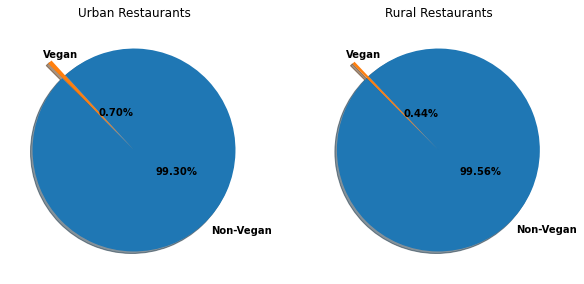

In [539]:
rural_veg_group = rural_clean_pop.groupby("Vegan Options")
urban_veg_group = urban_clean_pop.groupby("Vegan Options")
rural_veg = rural_veg_group["Vegan Options"].count()
urban_veg = urban_veg_group["Vegan Options"].count()
all_labels = ["Non-Vegan", "Vegan"]
explode = (0, 0.2)
fig, (ax1,ax2) = plt.subplots(1,2, figsize =(10,10))
ax1.pie(urban_veg, explode = explode, labels = all_labels, autopct = "%1.2f%%", pctdistance = 0.3, shadow = True, startangle =135, textprops = {'weight': 'bold', 'ha':'left'})
ax2.pie(rural_veg, explode = explode, labels = all_labels, autopct = "%1.2f%%", pctdistance = 0.3, shadow = True, startangle =135, textprops = {'weight': 'bold', 'ha':'left'})
ax1.set_title("Urban Restaurants")
ax2.set_title("Rural Restaurants")

plt.savefig("../Images/piechart.jpg", dpi = 100)
plt.show()


## Scatter plot

The correlation coefficient is 0.43


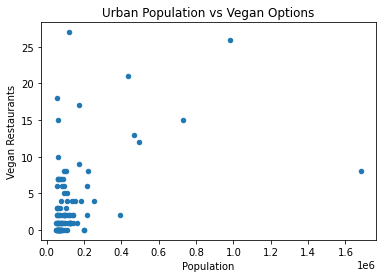

In [542]:
urban_scatter = urban_summary[["Population", "Vegan Restaurants"]]
urban_scatter.plot(x="Population", y = "Vegan Restaurants", kind = "scatter", title = "Urban Population vs Vegan Options")
correlation = st.pearsonr(urban_summary["Population"], urban_summary["Vegan Restaurants"])
print(f"The correlation coefficient is {round(correlation[0],2)}")
plt.show()

The r-value is: 0.43393336395681886 & the correlation coefficient is 0.43


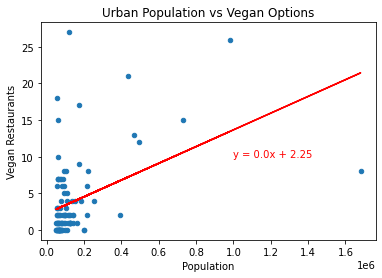

In [546]:
x = urban_summary["Population"]
y = urban_summary["Vegan Restaurants"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = slope * x + intercept
eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
urban_scatter.plot(x = "Population", y = "Vegan Restaurants", kind = "scatter", title = "Urban Population vs Vegan Options")
plt.plot(x, regress, "r-")
plt.annotate(eq, (1000000,10), color ="r")
print(f"The r-value is: {rvalue} & the correlation coefficient is {round(correlation[0],2)}")
plt.savefig("../Images/urbanscatter.jpg", dpi = 100)
plt.show()

The correlation coefficient is 0.3


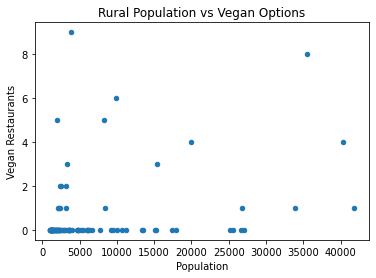

In [547]:
rural_scatter = rural_summary[["Population", "Vegan Restaurants"]]
rural_scatter.plot(x="Population", y = "Vegan Restaurants", kind = "scatter", title = "Rural Population vs Vegan Options")
correlation = st.pearsonr(rural_summary["Population"], rural_summary["Vegan Restaurants"])
print(f"The correlation coefficient is {round(correlation[0],2)}")
plt.show()

The r-value is: 0.30166056212192144 & the correlation coefficient is 0.3


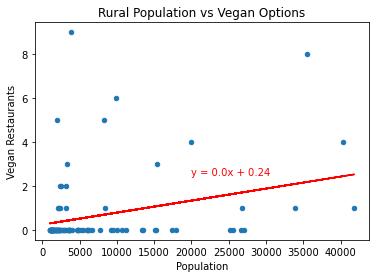

In [551]:
x = rural_summary["Population"]
y = rural_summary["Vegan Restaurants"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = slope * x + intercept
eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
rural_scatter.plot(x = "Population", y = "Vegan Restaurants", kind = "scatter", title = "Rural Population vs Vegan Options")
plt.plot(x, regress, "r-")
plt.annotate(eq, (20000,2.5), color ="r")
print(f"The r-value is: {rvalue} & the correlation coefficient is {round(correlation[0],2)}")
plt.savefig("../Images/ruralscatter.jpg", dpi = 100)
plt.show()